In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt; plt.rc('font', size=12)
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.cm as cm
from mlxtend.evaluate import permutation_test

In [2]:
# Define useful lookup variables

# Define the order of the taxa
order = ['B_cellulosilyticus_WH2', 
        'B_caccae', 
        'B_vulgatus', 
        'B_thetaiotaomicron', 
        'B_ovatus', 
        'R_obeum', 
        'B_uniformis', 
        'P_distasonis', 
        'C_scindens', 
        'C_aerofaciens', 
        'C_spiroforme', 
        # 'D_longicatena'
        ]

# Define the pretty names of the taxa
pretty_names_dir = {'B_caccae': '$B. caccae$',
                'B_cellulosilyticus_WH2': '$B. cellulosilyticus$ WH2',
                'B_ovatus': '$B. ovatus$',
                'B_thetaiotaomicron': '$B. thetaiotaomicron$',
                'B_uniformis': '$B. uniformis$',
                'B_vulgatus': '$B. vulgatus$',
                'C_aerofaciens': '$C. aerofaciens$',
                'C_scindens': '$C. scindens$',
                'C_spiroforme': '$C. spiroforme$',
                # 'D_longicatena': '$D. longicatena$',
                'P_distasonis': '$P. distasonis$',
                'R_obeum': '$R. obeum$'
                }

# Define the abbreviated names of the taxa
abbr_names_dir = {'B_caccae': 'Bca',
                'B_cellulosilyticus_WH2': 'Bce',
                'B_ovatus': 'Bov',
                'B_thetaiotaomicron': 'Bth',
                'B_uniformis': 'Bun',
                'B_vulgatus': 'Bvu',
                'C_aerofaciens': 'Cae',
                'C_scindens': 'Csc',
                'C_spiroforme': 'Csp',
                # 'D_longicatena': 'Dlo',
                'P_distasonis': 'Pdi',
                'R_obeum': 'Rob'
                }

# Define the order of the taxa using the pretty names
order_pretty = [pretty_names_dir[organism] for organism in order]

# Define the order of the taxa using the pretty names
order_abbrv = [abbr_names_dir[organism] for organism in order]

# Define the abbreviated names of the taxa
pretty_abbrv_dir = {pretty_names_dir[organism]:abbr_names_dir[organism] for organism in order}

In [3]:
# Define fuctions

# Function to classify the strength of evidence acording to the Bayes Factors
def evidence(x):
    if x < np.sqrt(10):
        return 'Weak'
    elif x < 10:
        return 'Moderate'
    elif x < 100:
        return 'Strong'
    else:
        return 'Very strong'

# Import tables

### LF0

In [4]:
input_path_lf0 = Path(f'mcnulty-results/best-chains/mcnulty-LF0-seed53/inference/posteriors')
nodes_lf0 = []
for param in ['growth', 'self_interaction', 'perturbation']:
    table = pd.read_table(input_path_lf0 / f'{param}.tsv', index_col=0)
    table = table.add_prefix(f'{param}_')
    nodes_lf0.append(table)
nodes_lf0 = pd.concat(nodes_lf0, axis=1)
# nodes_lf0 = nodes_lf0.loc[:,['growth_median', 
#                                  'growth_ci_l', 
#                                  'growth_ci_u', 
#                                  'self_interaction_median', 
#                                  'self_interaction_ci_l', 
#                                  'self_interaction_ci_u', 
#                                  'perturbation_median', 
#                                  'perturbation_ci_l', 
#                                  'perturbation_ci_u',
#                                  'perturbation_bayes_factors']]
nodes_lf0['perturbation_evidence'] = nodes_lf0['perturbation_bayes_factors'].apply(evidence)
nodes_lf0['perturbation_evidence'] = pd.Categorical(nodes_lf0['perturbation_evidence'], 
                                                      categories=['Weak', 'Moderate', 'Strong', 'Very strong'], 
                                                      ordered=True)
nodes_lf0.index = nodes_lf0.index.map(abbr_names_dir)
nodes_lf0

,growth_mean,growth_median,growth_mode,growth_std,growth_ci_l,growth_ci_u,self_interaction_mean,self_interaction_median,self_interaction_mode,self_interaction_std,self_interaction_ci_l,self_interaction_ci_u,perturbation_mean,perturbation_median,perturbation_mode,perturbation_std,perturbation_ci_l,perturbation_ci_u,perturbation_bayes_factors,perturbation_evidence
Bca,0.505426,0.516608,0.539511,0.162896,0.206456,0.806930,5.260275e-09,5.177534e-09,4.956234e-09,1.303455e-09,2.922288e-09,8.130839e-09,0.789384,0.748797,0.638234,0.420066,0.127354,1.720730,0.236722,Weak
Bce,0.858818,0.856963,0.832549,0.164314,0.540132,1.191693,1.611817e-09,1.537458e-09,1.377651e-09,6.111126e-10,5.978530e-10,3.012674e-09,-0.746312,-0.748904,-0.784866,0.134633,-1.007825,-0.487044,inf,Very strong
Bov,1.099622,1.101731,1.088130,0.155598,0.776461,1.399310,2.099976e-08,2.087923e-08,2.068033e-08,3.827242e-09,1.345160e-08,2.891168e-08,-1.027802,-1.011931,-1.010301,0.124962,-1.347188,-0.831679,inf,Very strong
Bth,0.728034,0.726435,0.721688,0.128600,0.475542,0.983541,1.450940e-08,1.455133e-08,1.529279e-08,2.662657e-09,9.280100e-09,1.974665e-08,-0.288669,-0.287881,-0.294199,0.116351,-0.517836,-0.076539,0.206370,Weak
Bun,0.393560,0.377172,0.323408,0.113311,0.212536,0.651406,1.673015e-08,1.602283e-08,1.460951e-08,5.324624e-09,8.273669e-09,2.892016e-08,-0.145048,-0.262488,-0.348262,0.418654,-0.717709,0.804652,0.051095,Weak
Bvu,0.338887,0.329527,0.312995,0.126160,0.128302,0.603648,4.561579e-09,4.394740e-09,4.291994e-09,2.031501e-09,1.256690e-09,8.877707e-09,-0.314153,-0.323899,-0.387533,0.275413,-0.784734,0.258271,0.048181,Weak
Cae,0.828786,0.825987,0.841814,0.175316,0.498159,1.187487,3.231307e-07,3.200298e-07,3.212769e-07,8.063437e-08,1.714988e-07,4.909309e-07,-0.488800,-0.489335,-0.494369,0.162335,-0.790346,-0.190529,2.303965,Weak
Csc,0.582194,0.579474,0.559119,0.154088,0.286693,0.894538,8.198402e-08,8.129637e-08,8.040569e-08,2.157089e-08,4.191623e-08,1.261531e-07,0.234190,0.247848,-0.302966,0.555949,-0.456462,1.314612,0.085973,Weak
Csp,0.817011,0.819964,0.798794,0.229370,0.357922,1.258245,1.319928e-06,1.306228e-06,1.166453e-06,3.866736e-07,5.747190e-07,2.139395e-06,-0.485863,-0.484667,-0.483386,0.181763,-0.829231,-0.169399,1.414487,Weak
Pdi,0.677465,0.678485,0.661864,0.151428,0.377929,0.967739,3.513493e-08,3.499824e-08,3.366261e-08,8.869007e-09,1.805196e-08,5.281490e-08,-0.501558,-0.501868,-0.529608,0.153262,-0.786207,-0.217423,2.647712,Weak


### HF0

In [5]:
input_path_hf0 = Path(f'mcnulty-results/best-chains/mcnulty-HF0-seed3/inference/posteriors')
nodes_hf0 = []
for param in ['growth', 'self_interaction', 'perturbation']:
    table = pd.read_table(input_path_hf0 / f'{param}.tsv', index_col=0)
    table = table.add_prefix(f'{param}_')
    nodes_hf0.append(table)
nodes_hf0 = pd.concat(nodes_hf0, axis=1)
# nodes_hf0 = nodes_hf0.loc[:,['growth_median', 
#                                  'growth_ci_l', 
#                                  'growth_ci_u', 
#                                  'self_interaction_median', 
#                                  'self_interaction_ci_l', 
#                                  'self_interaction_ci_u', 
#                                  'perturbation_median', 
#                                  'perturbation_ci_l', 
#                                  'perturbation_ci_u',
#                                  'perturbation_bayes_factors']]
nodes_hf0['perturbation_evidence'] = nodes_hf0['perturbation_bayes_factors'].apply(evidence)
nodes_hf0['perturbation_evidence'] = pd.Categorical(nodes_hf0['perturbation_evidence'], 
                                                      categories=['Weak', 'Moderate', 'Strong', 'Very strong'], 
                                                      ordered=True)
nodes_hf0.index = nodes_hf0.index.map(abbr_names_dir)
nodes_hf0

,growth_mean,growth_median,growth_mode,growth_std,growth_ci_l,growth_ci_u,self_interaction_mean,self_interaction_median,self_interaction_mode,self_interaction_std,self_interaction_ci_l,self_interaction_ci_u,perturbation_mean,perturbation_median,perturbation_mode,perturbation_std,perturbation_ci_l,perturbation_ci_u,perturbation_bayes_factors,perturbation_evidence
Bca,0.744705,0.751720,0.759784,0.104330,0.528177,0.929677,1.125673e-08,1.134499e-08,1.121069e-08,1.520803e-09,8.116740e-09,1.393539e-08,-0.380022,-0.380531,-0.396414,0.090966,-0.558025,-0.199910,3.573636,Moderate
Bce,0.166713,0.158105,0.150866,0.064124,0.069347,0.336919,2.723246e-09,2.631241e-09,2.513066e-09,6.979735e-10,1.602149e-09,4.474059e-09,1.954701,1.734893,1.345882,1.251423,0.684945,4.440559,26.829314,Strong
Bov,0.058021,0.025183,0.012668,0.083755,0.006713,0.326558,1.182645e-08,1.177414e-08,1.140479e-08,2.032207e-09,7.964028e-09,1.594731e-08,31.863047,26.946893,0.761563,25.433665,2.018876,98.576269,inf,Very strong
Bth,0.334516,0.330915,0.313668,0.068114,0.212043,0.480204,7.577148e-09,7.456039e-09,7.317597e-09,1.720773e-09,4.583649e-09,1.128817e-08,-0.217109,-0.172319,-0.185731,0.326883,-1.080564,0.294107,0.010929,Weak
Bun,0.206077,0.204787,0.193820,0.055455,0.100319,0.318653,1.828765e-08,1.811145e-08,1.762943e-08,4.290526e-09,1.031026e-08,2.722376e-08,1.666814,1.499761,0.632583,1.679394,0.663471,3.319472,14.285326,Strong
Bvu,0.318942,0.298572,0.276956,0.105201,0.159396,0.553331,4.275691e-09,4.117676e-09,3.612534e-09,1.341427e-09,2.119084e-09,7.326411e-09,-0.156008,-0.156140,-0.091010,0.493165,-1.162827,0.750460,0.016800,Weak
Cae,0.256832,0.250207,0.230898,0.088055,0.098145,0.454713,1.903471e-07,1.814728e-07,1.536217e-07,6.368442e-08,8.984972e-08,3.383810e-07,1.534626,0.856236,0.204306,4.983831,-0.183755,4.347889,0.115283,Weak
Csc,0.404987,0.398249,0.386454,0.103251,0.220659,0.626795,5.902675e-08,5.792511e-08,5.634610e-08,1.544365e-08,3.203658e-08,9.212692e-08,-0.408335,-0.334353,-0.351842,0.414260,-1.472590,0.228890,0.020813,Weak
Csp,0.504449,0.500503,0.488160,0.124443,0.272778,0.755529,8.411499e-07,8.317578e-07,8.295173e-07,2.129085e-07,4.524713e-07,1.285796e-06,-0.331704,-0.344876,-0.348242,0.164335,-0.624156,0.031710,0.048768,Weak
Pdi,0.240254,0.238704,0.235806,0.054345,0.139629,0.347331,2.020564e-08,1.985985e-08,1.952461e-08,4.183200e-09,1.296016e-08,2.956084e-08,1.170455,1.094642,0.965343,0.528535,0.375560,2.417170,1.624978,Weak


### Plot Growth Rates and Succeptibility Coefficients

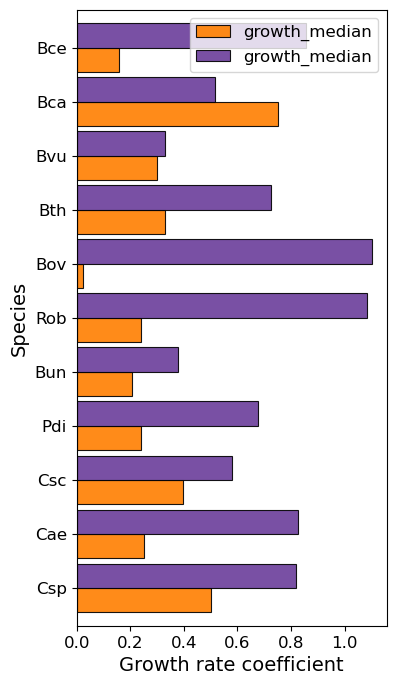

In [6]:
growth_lf0 = nodes_lf0.loc[:, ['growth_median']].copy()
growth_lf0 = growth_lf0.loc[order_abbrv[::-1], :]

growth_hf0 = nodes_hf0.loc[:, ['growth_median']].copy()
growth_hf0 = growth_hf0.loc[order_abbrv[::-1], :]

growth = pd.concat([growth_hf0, growth_lf0], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
growth.plot.barh(rot=0, 
    width=0.9, 
    figsize=(4, 8), 
    color=[cm.Paired(7), cm.Paired(9)],
    # color=[cm.Paired(6), cm.Paired(8)],
    edgecolor='k', 
    linewidth=0.8, 
    # legend=False,
    hatch='',
    alpha=0.9,
    ax=ax)
ax.set_xlabel('Growth rate coefficient', fontsize=14)
ax.set_ylabel('Species', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
# ax.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.savefig('mcnulty-results/growth_rate.svg', bbox_inches='tight')
plt.show()

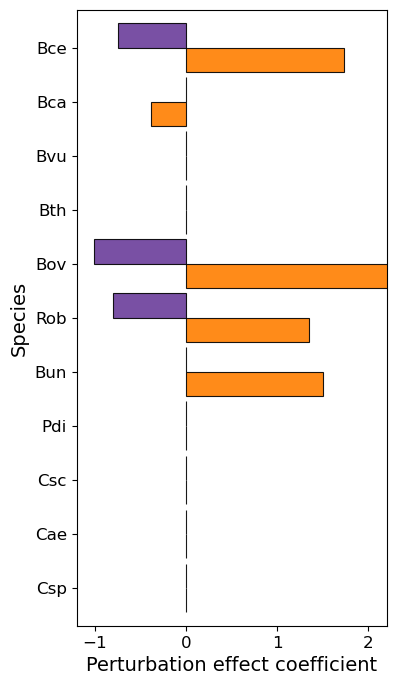

In [7]:
pert_lf0 = nodes_lf0.loc[:, ['perturbation_median']].copy()
pert_lf0['perturbation_median'] = [0 if nodes_lf0['perturbation_evidence'][i] == 'Weak' else pert_lf0['perturbation_median'][i] for i in pert_lf0.index]
pert_lf0 = pert_lf0.loc[order_abbrv[::-1], :]

pert_hf0 = nodes_hf0.loc[:, ['perturbation_median']].copy()
pert_hf0['perturbation_median'] = [0 if nodes_hf0['perturbation_evidence'][i] == 'Weak' else pert_hf0['perturbation_median'][i] for i in pert_hf0.index]
pert_hf0 = pert_hf0.loc[order_abbrv[::-1], :]

pert = pd.concat([pert_hf0, pert_lf0], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
pert.plot.barh(rot=0, 
    width=0.9, 
    figsize=(4, 8), 
    color=[cm.Paired(7), cm.Paired(9)],
    # color=[cm.Paired(6), cm.Paired(8)],
    edgecolor='k', 
    linewidth=0.8, 
    xlim=(-1.2, 2.2),
    legend=False,
    hatch='',
    alpha=0.9,
    ax=ax)

ax.set_xlabel('Perturbation effect coefficient', fontsize=14)
ax.set_ylabel('Species', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
# ax.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.savefig('mcnulty-results/perturbation.svg', bbox_inches='tight')
plt.show()

It is worth noting that the most abundant species does not necessarily have the highest growth rates. These has two explanations: 
1. The abundance of the species is not only determined by its growth rate, but also by its self-regulation rates and the interactions between the species.
2. Part of the growth of each species is also captured by the succceptibility coefficients, wich act as a modification to the growth rate.

### Plot Self-regulation Coefficients

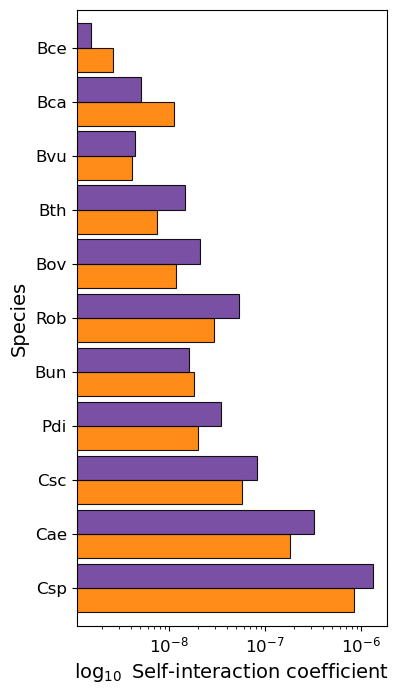

In [8]:
self_int_lf0 = nodes_lf0.loc[:, ['self_interaction_median']].copy()
self_int_lf0 = self_int_lf0.loc[order_abbrv[::-1], :]

self_int_hf0 = nodes_hf0.loc[:, ['self_interaction_median']].copy()
self_int_hf0 = self_int_hf0.loc[order_abbrv[::-1], :]

self_int = pd.concat([self_int_hf0, self_int_lf0], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
self_int.plot.barh(rot=0, 
    width=0.9, 
    figsize=(4, 8), 
    color=[cm.Paired(7), cm.Paired(9)],
    edgecolor='k', 
    linewidth=0.8, 
    legend=False,
    hatch='',
    alpha=0.9,
    logx=True,
    ax=ax)
ax.set_xlabel('$\log_{10}$ Self-interaction coefficient', fontsize=14)
ax.set_ylabel('Species', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
# ax.legend(handles, labels, loc=0)
# plt.savefig('mcnulty-results/self_interactions.svg', bbox_inches='tight')
plt.show()

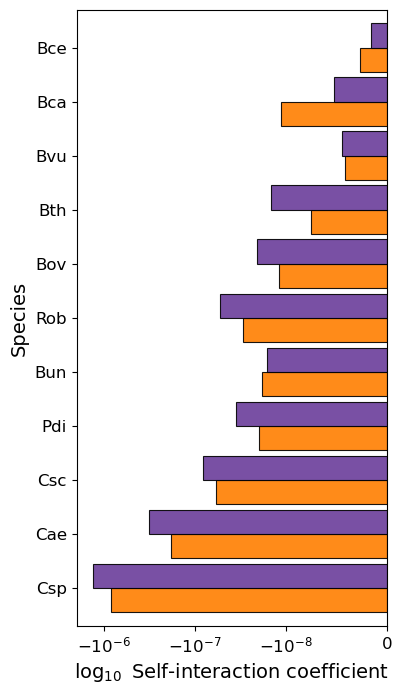

In [9]:
self_int_lf0 = nodes_lf0.loc[:, ['self_interaction_median']].copy()
self_int_lf0['self_interaction_median'] = -self_int_lf0['self_interaction_median']
self_int_lf0 = self_int_lf0.loc[order_abbrv[::-1], :]

self_int_hf0 = nodes_hf0.loc[:, ['self_interaction_median']].copy()
self_int_hf0['self_interaction_median'] = -self_int_hf0['self_interaction_median']
self_int_hf0 = self_int_hf0.loc[order_abbrv[::-1], :]

self_int = pd.concat([self_int_hf0, self_int_lf0], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
self_int.plot.barh(rot=0, 
    width=0.9, 
    figsize=(4, 8), 
    color=[cm.Paired(7), cm.Paired(9)],
    edgecolor='k', 
    linewidth=0.8, 
    legend=False,
    hatch='',
    alpha=0.9,
    # logx=True,
    # logx='sym',
    xlim=(-2e-6, 0),
    ax=ax)
ax.set_xscale('symlog', linthresh=1e-8)
ax.set_xlabel('$\log_{10}$ Self-interaction coefficient', fontsize=14)
ax.set_ylabel('Species', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
# ax.legend(handles, labels, loc=0)
plt.savefig('mcnulty-results/self_interactions.svg', bbox_inches='tight')
plt.show()

Species with the highest self-regulation coefficients are those with the lowest absolute abundances.

## Statistical Analysis

### Paired permitation test between self-regulation coefficients from LF0 and HF0

In [10]:
self_int_lf0 = np.log10(nodes_lf0['self_interaction_median'].values)
self_int_hf0 = np.log10(nodes_hf0['self_interaction_median'].values)
p_value_self_int = permutation_test(self_int_lf0, self_int_hf0, method='approximate', num_rounds=10000, seed=0, paired=True)
print('P value: %.3f' % p_value_self_int)

P value: 0.178


There are not significative differences between the self-regulation coefficients from LF0 and HF0.

### Paired permitation test between growth rate coefficients from LF0 and HF0

In [11]:
growth_lf0 = nodes_lf0['growth_median'].values
growth_hf0 = nodes_hf0['growth_median'].values
p_value_growth = permutation_test(growth_lf0, growth_hf0, method='approximate', num_rounds=10000, seed=0, paired=True)
print('P value: %.3f' % p_value_growth)

P value: 0.006


There are significative differences between the growth rates coefficients from LF0 and HF0.

In [12]:
pert_lf0 = nodes_lf0['perturbation_median'].values
pert_lf0 = np.array([0 if nodes_lf0['perturbation_evidence'][i] == 'Weak' else pert_lf0[i] for i in range(len(pert_lf0))])
pert_hf0 = nodes_hf0['perturbation_median'].values
pert_hf0 = np.array([0 if nodes_hf0['perturbation_evidence'][i] == 'Weak' else pert_hf0[i] for i in range(len(pert_hf0))])

### Paired permitation test between succeptibility coefficients from LF0 and HF0

In [13]:
p_value_pert = permutation_test(pert_lf0, pert_hf0, method='approximate', num_rounds=10000, seed=0, paired=True)
print('P value: %.3f' % p_value_pert)

P value: 0.128


There are not significative differences between the succeptibilty coefficients from LF0 and HF0.

### Paired permitation test between the term considering the modification made by the succeptibility coefficients to the growth rates

In [14]:
pert_lf0 = nodes_lf0['perturbation_median'].values
pert_lf0 = np.array([0 if nodes_lf0['perturbation_evidence'][i] == 'Weak' else pert_lf0[i] for i in range(len(pert_lf0))])
pert_hf0 = nodes_hf0['perturbation_median'].values
pert_hf0 = np.array([0 if nodes_hf0['perturbation_evidence'][i] == 'Weak' else pert_hf0[i] for i in range(len(pert_hf0))])

growth_pert_lf0 = (1 + pert_lf0) * growth_lf0
growth_pert_hf0 = (1 + pert_hf0) * growth_hf0

p_value_growth_pert_hf = permutation_test(growth_pert_lf0, growth_hf0, method='approximate', num_rounds=10000, seed=0, paired=True)
p_value_growth_pert_lf = permutation_test(growth_lf0, growth_pert_hf0, method='approximate', num_rounds=10000, seed=0, paired=True)
print('P value: %.3f' % p_value_growth_pert_hf)
print('P value: %.3f' % p_value_growth_pert_lf)

P value: 0.050
P value: 0.004


Note that when the entire term for the growth rate is considered, there are not significative differences between LF0 and HF0.